## Super Data Science Community Project - News Article Classification

Author: Karl Munroe

SuperData Science Profile: https://community.superdatascience.com/u/4157ad30

LinkedIn Profile: https://www.linkedin.com/in/karl-munroe-26b51843


### Project Objectives

* Build a model which accurately classifies news articles to an appropriate topic
* Build a web app interface which allows users to use the model

Project will be based on the BBC article dataset available on kaggle.com

Link: https://www.kaggle.com/datasets/jacopoferretti/bbc-articles-dataset/data

In [2]:
# import the basic data handling libraries
import numpy as np
import pandas as pd

In [3]:
#Loading the dataset
dataset = pd.read_csv('bbc_news_text_complexity_summarization.csv')

In [4]:
dataset.head()

,text,labels,no_sentences,Flesch Reading Ease Score,Dale-Chall Readability Score,text_rank_summary,lsa_summary
0,Ad sales boost Time Warner profit\n\nQuarterly...,business,26,62.17,9.72,It hopes to increase subscribers by offering t...,Its profits were buoyed by one-off gains which...
1,Dollar gains on Greenspan speech\n\nThe dollar...,business,17,65.56,9.09,The dollar has hit its highest level against t...,"""I think the chairman's taking a much more san..."
2,Yukos unit buyer faces loan claim\n\nThe owner...,business,14,69.21,9.66,The owners of embattled Russian oil giant Yuko...,Yukos' owner Menatep Group says it will ask Ro...
3,High fuel prices hit BA's profits\n\nBritish A...,business,24,62.98,9.86,Looking ahead to its full year results to Marc...,"Rod Eddington, BA's chief executive, said the ..."
4,Pernod takeover talk lifts Domecq\n\nShares in...,business,17,70.63,10.23,Reports in the Wall Street Journal and the Fin...,Shares in UK drinks and food firm Allied Domec...


In [5]:
# Look at the structute of the datset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127 entries, 0 to 2126
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   text                          2127 non-null   object 
 1   labels                        2127 non-null   object 
 2   no_sentences                  2127 non-null   int64  
 3   Flesch Reading Ease Score     2127 non-null   float64
 4   Dale-Chall Readability Score  2127 non-null   float64
 5   text_rank_summary             2127 non-null   object 
 6   lsa_summary                   2127 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 116.4+ KB


In [6]:
# simplifies the names of the columns 
dataset.rename(columns={'Flesch Reading Ease Score':'FleschScore', 'Dale-Chall Readability Score': 'DaleChallScore'}, inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127 entries, 0 to 2126
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   text               2127 non-null   object 
 1   labels             2127 non-null   object 
 2   no_sentences       2127 non-null   int64  
 3   FleschScore        2127 non-null   float64
 4   DaleChallScore     2127 non-null   float64
 5   text_rank_summary  2127 non-null   object 
 6   lsa_summary        2127 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 116.4+ KB


### Exploring any patterns using visuals

Overview of the characteristics of the Dataset, the Number of Sentences, Fleshch Reading Ease Score and the Dale-Chall Readability Score

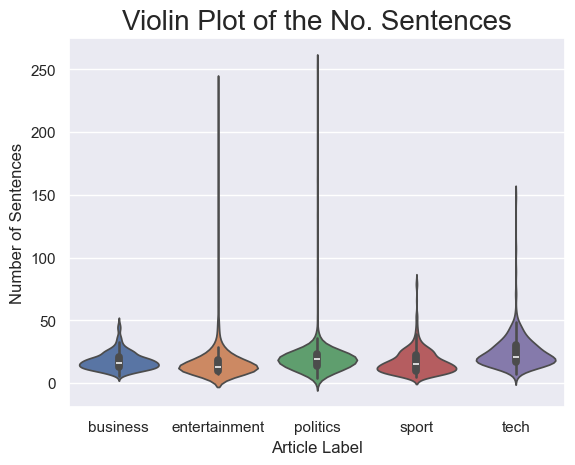

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Draw a violin plot to compare the distributions of the number of sentences in each type of article
axes = sns.violinplot(dataset, x='labels',y='no_sentences', hue='labels')
axes.set_xlabel('Article Label')
axes.set_ylabel('Number of Sentences')
axes.set_title('Violin Plot of the No. Sentences', fontsize=20)
plt.show()

In [8]:
print('Overall Avereage sentences: ', round(dataset.no_sentences.mean(),1))
print('Avereage sentences business: ',round(dataset[dataset.labels=='business'].no_sentences.mean(),1))
print('Avereage sentences entertainment: ', round(dataset[dataset.labels=='entertainment'].no_sentences.mean(),1))
print('Avereage sentences politics: ',round(dataset[dataset.labels=='politics'].no_sentences.mean(),1))
print('Avereage sentences sport: ',round(dataset[dataset.labels=='sport'].no_sentences.mean(),1))
print('Avereage sentences tech: ',round(dataset[dataset.labels=='tech'].no_sentences.mean(),1))

Overall Avereage sentences:  19.0
Avereage sentences business:  17.7
Avereage sentences entertainment:  16.6
Avereage sentences politics:  20.0
Avereage sentences sport:  17.1
Avereage sentences tech:  24.9


The number of sentences between in the various types of articles, on average, all seem to have relatively the same distribution and fall closely to the average of 19 sentences. Articles with significant outliers are in the subject areas of Politics, Entertainment and Tech.

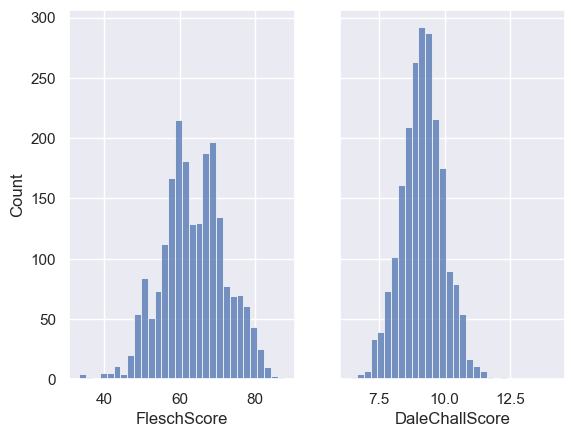

In [9]:
figure, axes2 = plt.subplots(1, 2, sharey=True) 
hist1 = sns.histplot(dataset['FleschScore'], kde=False, ax=axes2[0], bins=30)
hist2 = sns.histplot(dataset['DaleChallScore'], kde=False, ax=axes2[1], bins=30)
plt.show()


The distribution of the Flesch and Dale-Chall score likely follow a normal distribution from the plot of the histograms

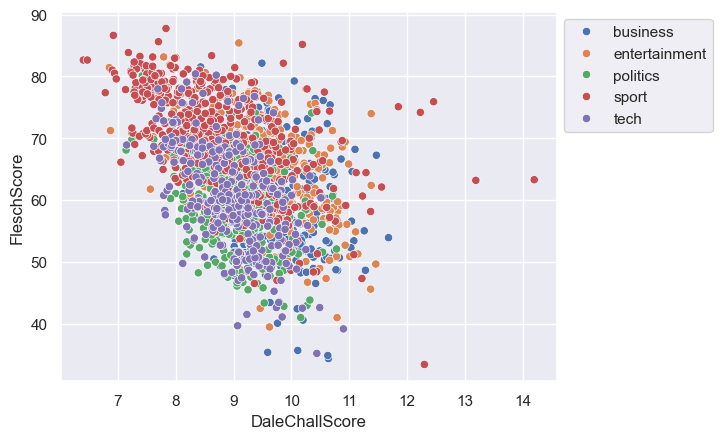

In [10]:
axes3 = sns.scatterplot(data=dataset, y='FleschScore', x='DaleChallScore', hue='labels')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()


From the scatter plot there is no clear pattern for the between the individual Article labels. The plot indicates that for the vast majority of the articles requires at least a high school level to college level (Dale-Chall 7.0+ and Flesch 40+) education to read. More exploration will need to be done for the individual article labels.

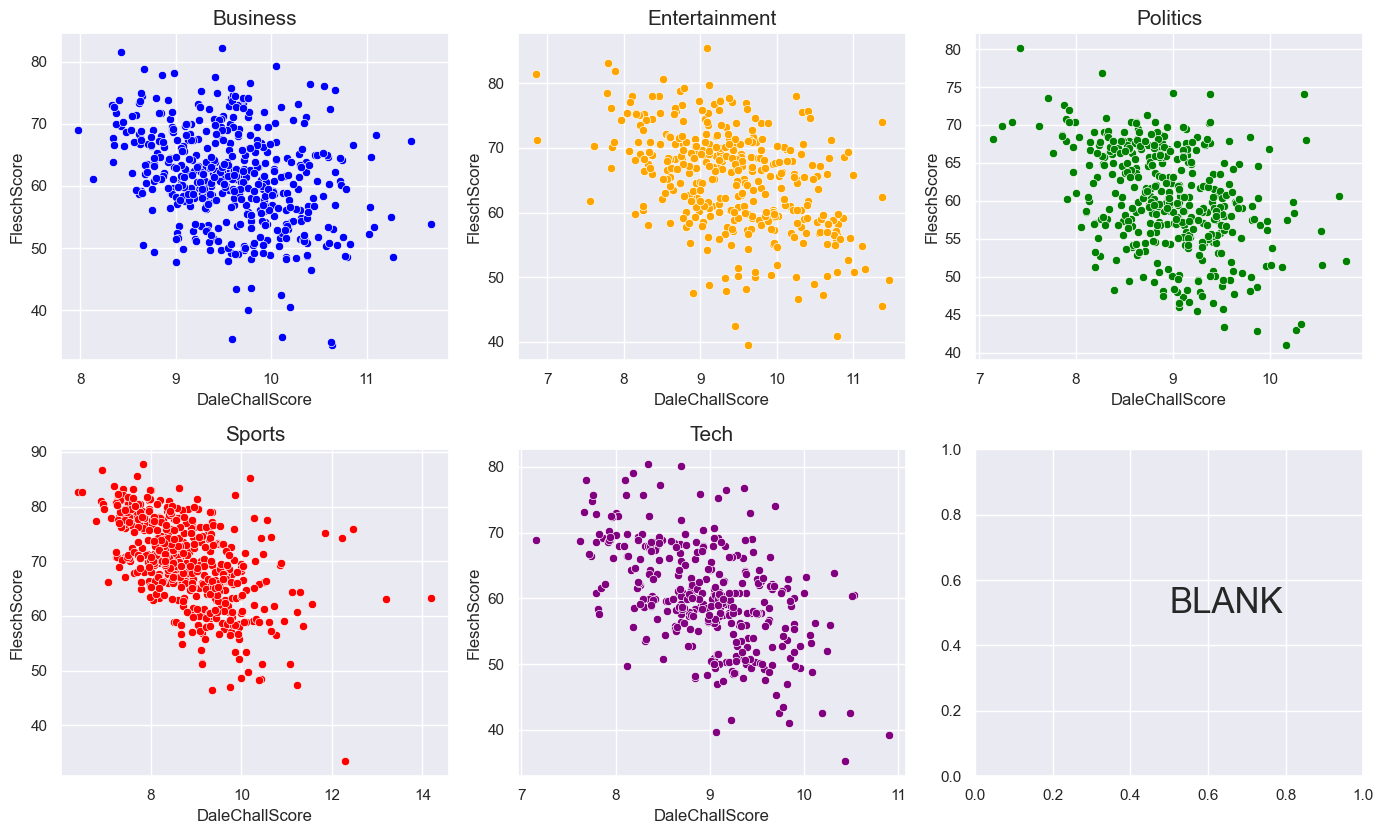

In [38]:
figure5, axes5 = plt.subplots(2,3,figsize=(14,8.5) )
# plot the scatterplots
fig_bus = sns.scatterplot(data=dataset, y=dataset[dataset.labels == 'business'].FleschScore, x=dataset[dataset.labels == 'business'].DaleChallScore, ax=axes5[0,0], c='Blue')
fig_bus.set_title('Business', size=15)
fig_ent = sns.scatterplot(data=dataset, y=dataset[dataset.labels == 'entertainment'].FleschScore, x=dataset[dataset.labels == 'entertainment'].DaleChallScore, ax=axes5[0,1], c='orange')
fig_ent.set_title('Entertainment', size=15)
fig_pol = sns.scatterplot(data=dataset, y=dataset[dataset.labels == 'politics'].FleschScore, x=dataset[dataset.labels == 'politics'].DaleChallScore, ax=axes5[0,2], c='green')
fig_pol.set_title('Politics', size=15)
fig_sport = sns.scatterplot(data=dataset, y=dataset[dataset.labels == 'sport'].FleschScore, x=dataset[dataset.labels == 'sport'].DaleChallScore, ax=axes5[1,0], c='red')
fig_sport.set_title('Sports', size=15)
fig_tech = sns.scatterplot(data=dataset, y=dataset[dataset.labels == 'tech'].FleschScore, x=dataset[dataset.labels == 'tech'].DaleChallScore, ax=axes5[1,1], c='purple')
fig_tech.set_title('Tech', size=15)
axes5[1,2].text(0.5,0.5, 'BLANK', fontsize=25)
plt.tight_layout()
plt.show()

The trend in individual scatter plots of the article labels show a similar pattern as in the combined scatter in the Flesh and Dale-Chall scores. 

The suggested analysis of the text should be based on a bag of words model.